In [1]:
import random
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
import time
from scipy import fft
from scipy import signal

In [2]:
def show_picture_plot(image, title: str='window_name'):
    try:
        plt.figure(figsize=(10,10))
        plt.title(title)
        plt.imshow(image, cmap='gray')
    except Exception :
        # cv.destroyAllWindows()
        print('error')

In [3]:
def show_picture(image, title: str='window_name'):
    try:
        cv.imshow(title, image)
        cv.waitKey(0)
        cv.destroyAllWindows()
    except Exception :
        cv.destroyAllWindows()
        print('error')

def show_picture_not_close(image, title: str='window_name'):
    try:
        cv.imshow(title, image)
        # cv.waitKey(0)
        # cv.destroyAllWindows()
    except Exception :
        cv.destroyAllWindows()
        print('error')

def inverse_image(image):
    if len(image.shape)==2:
        # start_time = time.time()
        image=np.array(image)
        x_len, y_len = image.shape[0], image.shape[1]
        vmax = np.max(image)

        new_image = vmax - (1) - image

        result = np.array(new_image)
        return result

In [4]:
def gray_image(image):
    mx = np.max(image)
    mn = np.min(image)
    amp = mx-mn
    img_restore_shift = (((image-mn)/amp)*255).astype('int')
    if (np.max(img_restore_shift)>255):
        img_restore_shift = gray_image(img_restore_shift)
    return img_restore_shift

In [5]:
def build_histogram(image):
    x_len, y_len = image.shape[0], image.shape[1]


    histogram = np.zeros(256)
    print(histogram.shape)
    for i in range(x_len):
        for e in range(y_len):
            histogram[image[i,e]]+=1
    mx = np.max(histogram)
    histogram = (histogram/mx)*255
    return histogram

def build_cdf(histogram):
    cdf = np.zeros(256)
    cdf[0] = histogram[0]
    for i in range(1, histogram.shape[0]):
        cdf[i]+=cdf[i-1]+histogram[i]
    mx = np.max(cdf)
    cdf = (cdf/mx)*255
    return cdf

In [6]:
from numpy import ndarray
from typing import Union
from random import randint


def fourier_transform_1d(vector, dt=None, in_complex=False):
    # start_time = time.time()
    N = len(vector)
    if dt:
        # dt = 1
        fgr = 1. / (dt * 2)
        print(fgr)
        df = (2. * fgr) / N
        print(df)
        gr = int(fgr / df)*2
        # data_new = vector.copy()[:int(fgr / df)]
        if in_complex:
            data_new = np.zeros(gr, np.csingle)
        else:
            data_new = np.zeros(gr, np.float)
        data_x_new = df * np.array(range(int(fgr / df)))


        data_np = np.array(vector)
    else:
        # data_new = np.zeros(N//2)
        gr = N
        if in_complex:
            data_new = np.zeros(gr, np.csingle)
        else:
            data_new = np.zeros(gr, np.float)
        data_x_new = np.array(range(N // 2))

        data_np = np.array(vector)

    '''Спектр высчитывается вручную'''
    for n in range(gr):
        # re = 0
        # im = 0
        # for k in range(N):
        #     re += image_vector[k] * math.cos((2 * math.pi * n * k) / N)
        #     im += image_vector[k] * math.sin((2 * math.pi * n * k) / N)
        '''Оптимизированный способ'''
        # re = np.sum(data_np * np.cos((2 * np.pi * n * np.arange(N)) / N))
        # im = np.sum(data_np * np.sin((2 * np.pi * n * np.arange(N)) / N))
        # re /= N
        # im /= N
        imre = np.sum(data_np*np.exp(2*(-1j)*np.pi*n*np.arange(N)/N))
        if in_complex:
            # data_new[n] = complex(re, im)
            data_new[n] = imre
        else:
            # data_new[n] = math.sqrt(re ** 2 + im ** 2)
            # data_new[n] = re + im
            data_new[n] = imre.real+imre.imag
    # print('elapsed', time.time() - start_time)

    # tmp = data_new[gr//2:]
    # data_new = np.array(list(tmp)+list(data_new[:gr//2]))

    return data_new

def fourier_transform_1d_back(complex_vector, dt=None):
    # start_time = time.time()
    N = len(complex_vector)
    if dt:
        # dt = 1
        fgr = 1. / (dt * 2)
        print(fgr)
        df = (2. * fgr) / N
        print(df)
        gr = int(fgr / df)*2
        data_new = np.zeros(gr, np.float)
        data_x_new = df * np.array(range(int(fgr / df)))
        data_np = np.array(complex_vector)
    else:
        gr = N
        data_new = np.zeros(gr)
        data_x_new = np.array(range(N // 2))

        data_np = np.array(complex_vector)

    '''Спектр высчитывается вручную'''
    for n in range(gr):
        # re = 0
        # im = 0
        # for k in range(N):
        #     re += image_vector[k] * math.cos((2 * math.pi * n * k) / N)
        #     im += image_vector[k] * math.sin((2 * math.pi * n * k) / N)

        '''Оптимизированный способ'''
        # re = np.sum(data_np * np.cos((2 * math.pi * n * np.arange(N)) / N))
        # im = np.sum(data_np * np.sin((2 * math.pi * n * np.arange(N)) / N))
        # re /= N
        # im /= N
        # data_new[n] = re + im

        imr = np.sum(data_np * np.exp(1j *2*dt * np.pi*n*np.arange(N))/N)
        data_new[n] = complex(imr).real+complex(imr).imag

    # print('elapsed', time.time() - start_time)
    return data_new

def diff_func(vector, dt=None):
    N = len(vector)
    diff = np.zeros(N)

    for i in range(N-1):
        if vector[i]==0:
            diff[i]=0
            continue
        if dt:
            diff[i] = (vector[i+1]-vector[i])/dt
        else:
            diff[i] = (vector[i+1]-vector[i])
    return diff


def fourier_transform_2d(matrix, dt=None, in_complex=False):
    # start_time = time.time()
    xl, yl = matrix.shape[0], matrix.shape[1]
    print(xl)
    if dt:
        fgr = 1. / (dt * 2)
        df = (2. * fgr) / yl
        gr = int(fgr / df)*2
        data_new = np.zeros(gr, np.csingle)
    else:
        gr = yl
        data_new = np.zeros(gr, np.csingle)

    '''Спектр высчитывается вручную'''
    # matrix_n = np.zeros((xl,yl),np.csingle)
    #
    # for ix in range(xl):
    #     for ey in range(yl):
    #         sm = 0
    #         for il in range(x):
    #             for el in range(y):
    #                 sm+=matrix[il,el]*np.exp(-1j*2*np.pi*((ix*il)/x+(ey*el)/y))
    #         matrix_n[ix,ey] = sm

    matrix_n = np.fft.fft2(matrix)
    # matrix_n1 = list(matrix_n[:xl//2, :yl//2])
    # matrix_n2 = list(matrix_n[:xl//2, yl//2:])
    # matrix_n3 = list(matrix_n[xl//2:, :yl//2])
    # matrix_n4 = list(matrix_n[xl//2:, yl//2:])
    #
    # n_matrix1 = matrix_n4 + matrix_n2
    # n_matrix2 = matrix_n3 + matrix_n1
    # n_matrix = n_matrix1+n_matrix2

    # matrix_n = np.zeros(matrix_n.shape)
    # matrix_n[:xl//2, :yl//2] = matrix_n3
    # matrix_n[:xl//2, yl//2:] = matrix_n4
    # matrix_n[xl//2:, :yl//2] = matrix_n1
    # matrix_n[xl//2:, yl//2:] = matrix_n2

    return matrix_n
    # return np.array(matrix_n)

def fourier_transform_2d2(matrix, dt=None, in_complex=False):
    # start_time = time.time()
    xl, yl = matrix.shape[0], matrix.shape[1]
    print(xl)
    if dt:
        fgr = 1. / (dt * 2)
        df = (2. * fgr) / yl
        gr = int(fgr / df)*2
        data_new = np.zeros(gr, np.csingle)
    else:
        gr = yl
        data_new = np.zeros(gr, np.csingle)

    ar = []
    for i in range(xl):
        ft = np.fft.fft(matrix[i])
        ar.append(ft)
    ar = np.array(ar)
    nar = []
    for i in range(yl):
        ft = np.fft.fft(ar[:, i])
        nar.append(ft)

    matrix_n = np.array(nar)
    return matrix_n
    # return np.array(matrix_n)

def fourier_transform_2d_back(matrix, dt=None, in_complex=False):
    # start_time = time.time()
    xl, yl = matrix.shape[0], matrix.shape[1]
    print(xl)
    if dt:
        fgr = 1. / (dt * 2)
        df = (2. * fgr) / yl
        gr = int(fgr / df)*2
    else:
        gr = yl

    '''высчитывается вручную'''
    # matrix_n = np.zeros((xl,yl),np.csingle)
    #
    # for ix in range(xl):
    #     for ey in range(yl):
    #         sm = 0
    #         for il in range(x):
    #             for el in range(y):
    #                 sm+=matrix[il,el]*np.exp(1j*2*np.pi*((ix*il)/x+(ey*el)/y))
    #         matrix_n[ix,ey] = sm

    matrix_n = fft.ifft2(matrix)

    return matrix_n

def show_plot(func, x=None,  title = 'title'):
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.grid()
    if x is not None:
        plt.plot(x, func)
    else:
        plt.plot(func)

def show_plots(funcs, x=None,  title = 'title'):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    plt.title(title)
    plt.grid()
    for i in range(len(funcs)):
        if x is not None:
            ax.plot(x, funcs[i])
        else:
            ax.plot(funcs[i])

def gamma_transform_image(image, C: float, gamma: float):
    # try:
    # print('here')
    new_image = []
    if len(image.shape)==2:
        # start_time = time.time()
        image=np.array(image)
        x_len, y_len = image.shape[0], image.shape[1]
        # print(image[:10])
        new_image = C * (image ** gamma)
        # print(new_image[:10])

        result = np.array(new_image)
        # result = np.array(new_image)
        # print('time', time.time()-start_time)
        # print('orig shape', result.shape)
        return result

    # except Exception:
    #     cv.destroyAllWindows()
    #     print('error')

def equalize(image, cdf):
    x_len, y_len = image.shape[0], image.shape[1]
    new_image = np.zeros((x_len, y_len))
    int_hist = np.array(cdf).astype('int')
    for i in range(x_len):
        for e in range(y_len):
            new_image[i,e] = int_hist[image[i,e]]

    return new_image

def autocorrelation_vector(vector):
    n = vector.shape[0]
    av = np.average(vector)
    vector_av = vector-av
    new_vector = []
    for lp in range(n):
        sm = 0
        for i in range(n-lp-1):
            sm+=vector_av[i]*vector_av[i+lp]
        new_vector.append(sm/n)
    return np.array(new_vector)

def correlation_vector(vector, vector2):
    n = vector.shape[0]
    av = np.average(vector)
    av2 = np.average(vector2)
    vector_av = vector-av
    vector2_av = vector2-av2
    new_vector = []
    for lp in range(n):
        sm = 0
        for i in range(n-lp-1):
            sm+=vector_av[i]*vector2_av[i+lp]
        new_vector.append(sm/n)
    return np.array(new_vector)

def convolution(vector1, vector2):
    """
    Функция свёртки

    :param
    :return:
    """
    M = len(vector1)
    N = len(vector2)

    # data_new = np.zeros(N+M)
    #
    # for k in range(N+M):
    #     sm = 0
    #     for j in range(M):
    #         if k-j < 0:
    #             sm += func.data[k - j] * self.data[j]
    #             continue
    #         if k-j>=N:
    #             sm += func.data[(k - j)%N] * self.data[j]
    #             continue
    #         sm += func.data[(k - j) % N] * self.data[j]
    #     data_new[k] = sm
    #
    # data_new = data_new[M//2:-M//2]
    # data_x_new = np.array(range(N))

    '''с помощью библиотеки'''
    data_new = signal.convolve(vector1, vector2, mode='same')
    # data_new = np.convolve(self.data, func.data, mode='full')
    # data_x_new = np.arange(len(data_new))

    return data_new

def normilize(vector, vl=None):
    mx = vl
    if vl is None:
        mx = np.max(vector)
    vector/=mx
    return vector

class Filter:
    """Цифровые фильтры частот"""

    @staticmethod
    def lpf(fc, dt, m) -> list:
        data = []
        m: int = m
        fc: float = fc
        dt: float = dt

        d = [0.35577019, 0.2436983, 0.07211497, 0.00630165]
        # rectangular part weights
        fact = 2 * fc * dt
        arg = fact * np.pi
        data = np.sin(arg * np.array(range(1, m + 1))) / np.array(np.array(range(1, m + 1)) * np.pi)
        data = list(data)
        data.insert(0, fact)

        # trapezoid smoothing in the end
        data[m] /= 2.
        #
        # # P310 smoothing window
        sumg = data[0]
        for i in range(1, m + 1):
            sum = d[0]
            arg = np.pi * i / m
            for k in range(1, 4):
                sum += 2. * d[k] * np.cos(arg * k)
            data[i] *= sum
            sumg += 2 * data[i]

        for i in range(m + 1):
            data[i] /= sumg

        sym_data = data[:0:-1]
        data = sym_data + data

        return data

    @staticmethod
    def hpf(fc, dt, m) -> list:
        data = []
        lpw = Filter.lpf(fc, dt, m)
        mmax = max(lpw)
        for i in range(2*m+1):
            val = 1.-lpw[i] if i == m else -lpw[i]
            data.append(val)

        return data

    @staticmethod
    def bpf(fc1, fc2, dt, m) -> list:
        data = []
        lpw1 = Filter.lpf(fc1, dt, m)
        lpw2 = Filter.lpf(fc2, dt, m)
        if fc1 >= fc2:
            raise Exception('fc1 must be less then fc2')
        for i in range(2 * m + 1):
            data.append(lpw2[i]-lpw1[i])

        return data

    @staticmethod
    def bsf(fc1, fc2, dt, m) -> list:
        data = []
        lpw1 = Filter.lpf(fc1, dt, m)
        lpw2 = Filter.lpf(fc2, dt, m)
        if fc1 >= fc2:
            raise Exception('fc1 must be less then fc2')
        for i in range(2 * m + 1):
            val = 1. + lpw1[i] - lpw2[i] if i == m else lpw1[i] - lpw2[i]
            data.append(val)

        return data

def generate_salt_noise(form:Union[tuple, ndarray], n, val, d=10):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.zeros((x,y))
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
    rng = np.arange(x)
    for i in range(x):
        nn = randint(0,n)
        pos = random.sample(range(y), int(nn))
        image[i, pos] += randint(val-d, val+d)
    return image.astype('int')

def generate_salt_noise2(form:Union[tuple, ndarray], n, val, d=10):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.zeros((x,y))
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
    rng = np.arange(x)

    for i in range(x):
        nn = randint(0,n)
        pos = random.sample(range(y), int(nn))
        image[i, pos] += randint(val-d, val+d)
    for i in range(y):
        nn = randint(0,n)
        pos = random.sample(range(x), int(nn))
        image[pos, i] += randint(val-d, val+d)
    return image.astype('int')

def generate_pepper_noise(form:Union[tuple, ndarray], n, val, d=10):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.zeros((x,y))
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
    rng = np.arange(x)
    for i in range(x):
        nn = randint(0,n)
        pos = random.sample(range(y), int(nn))
        image[i, pos] -= randint(val-d, val+d)
        image[image<0] = 0
    return image.astype('int')

def generate_pepper_noise2(form:Union[tuple, ndarray], n, val, d=10):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.zeros((x,y))
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
    rng = np.arange(x)

    for i in range(x):
        nn = randint(0,n)
        pos = random.sample(range(y), int(nn))
        image[i, pos] -= randint(val-d, val+d)

    for i in range(y):
        nn = randint(0,n)
        pos = random.sample(range(x), int(nn))
        image[pos, i] -= randint(val-d, val+d)

    # image[image<0] = 0
    return image.astype('int')

def generate_random_noise2(form:Union[tuple, ndarray], mn=0, mx=0):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.random.random(size=(x,y)) * (mx - mn) + mn
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
        image+=np.array(np.random.random(size=(x,y)) * (mx - mn) + mn, 'int')

    return np.array(image, 'int')

def avg_filter_clear(image, shape):
    image_c = np.array(image)
    image_c2 = np.array(image)

    dx = 0
    dy = 0

    lx,ly = image.shape

    mx, my = shape[0]//2, shape[1]//2

    for i in range(lx):
        for e in range(ly):
            le = i-mx if i-mx >= 0 else 0
            lr = i+mx if i+mx < lx else lx
            re = e-my if e-my >= 0 else 0
            rr = e+my if e+my < ly else ly
            image_c2[i, e] = np.average(image_c[le:lr,re:rr])
    return image_c2

def mean_filter_clear(image, shape):
    image_c = np.array(image)
    image_c2 = np.array(image)

    dx = 0
    dy = 0

    lx,ly = image.shape

    mx, my = shape[0]//2, shape[1]//2

    for i in range(lx):
        for e in range(ly):
            le = i-mx if i-mx >= 0 else 0
            lr = i+mx if i+mx < lx else lx
            re = e-my if e-my >= 0 else 0
            rr = e+my if e+my < ly else ly
            image_c2[i, e] = np.median(image_c[le:lr,re:rr])
    return image_c2

def add_zeros(data, size):
    n_array = np.zeros(size)
    if isinstance(size, tuple):
        print('is tuple')
        xl, yl = size
        if len(data.shape) == 2:
            print('2')
            xd, yd = data.shape
            tmp = (xl - xd)/2
            stx, endx = tmp, xl-tmp
            tmp = (yl - yd)/2
            sty, endy = tmp, yl-tmp

            n_array[stx:endx,sty:endy] = data

        else:
            xd, yd = 1, len(data)
            tmp = (xl - xd)/2
            stx, endx = int(tmp), int(xl-tmp)
            tmp = (yl - yd)/2
            sty, endy = int(tmp), int(yl-tmp)

            n_array[stx:endx,sty:endy] = data
    return n_array

def best_image(image2):
    image_g = gray_image(image2)
    print(np.max(image_g))
    hist = build_histogram(image_g)
    dist = build_cdf(hist)

    image_r = equalize(image_g, dist)
    return image_r

In [59]:
path = r"D:\study\moed2\9lab\blur259x185L_N.dat"
# path = r"D:\study\moed2\9lab\blur259x185L.dat"
xlen, ylen = 259, 185

In [60]:
dtype = np.dtype('float32')
arr = np.fromfile(path, dtype=dtype, sep='')
ln_all = len(arr)
ln_need = xlen*ylen
print(ln_all)
print(ln_need)

47915
47915


In [61]:
arr=arr[ln_all-ln_need:]
new_arr = np.reshape(arr, (ylen, xlen))

[[3.00556302 3.57057571 3.87613106 5.09047365 3.56675506 4.27234221
  3.25253415 3.88210678 4.50407267 4.74094534]
 [3.00556302 3.57057571 3.87613106 5.09047365 3.56675506 4.27234221
  3.25253415 3.88210678 4.50407267 4.74094534]
 [2.82579899 2.27725363 4.50362444 3.245646   3.73652864 3.0623219
  4.05404377 4.46806622 3.27577281 4.46085215]
 [3.83197665 4.50216722 4.12522316 4.93987274 3.33189631 4.06189489
  4.19748497 3.27643991 3.9590919  3.31923556]
 [3.78167725 2.88725066 4.52371645 4.68605089 1.88998079 4.14387894
  4.6123929  5.10130739 4.10582113 5.41862965]
 [4.16034651 2.913203   4.29785824 4.76046467 3.78113461 1.93219495
  2.88067818 4.08940029 3.5372498  4.02318907]
 [3.44756603 2.19385314 3.47237849 2.72550535 5.06206226 5.77427626
  4.44659615 3.60312343 4.24761009 3.44997025]
 [3.55417395 2.85825348 3.3073287  5.55164623 3.43730855 3.83524704
  3.86799622 4.07476759 4.22876358 3.94716024]
 [5.10180998 3.33150125 2.47738147 2.77431703 2.35144377 4.65118599
  4.04151201 

True

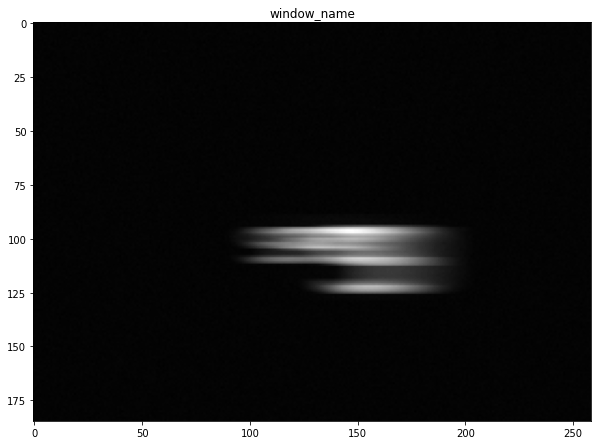

In [62]:
img = np.array(new_arr, dtype='float')
print(img[:10,:10])
show_picture_plot(img)

cv.imwrite(r"D:\study\moed2\9lab\blur259x185LN.jpg", img)

In [11]:
path_kern = r"D:\study\moed2\9lab\kernL64_f4.dat"
xlen_kern = 64

In [12]:
dtype = np.dtype('float32')
arr = np.fromfile(path_kern, dtype=dtype, sep='')
ln_all = len(arr)
ln_need = xlen_kern
print(ln_all)
print(ln_need)

64
64


[0.         0.48096073 0.94173837 1.38185549 1.80091059 2.19857574
 2.57459402 2.92877984 3.26101327 3.57124043]


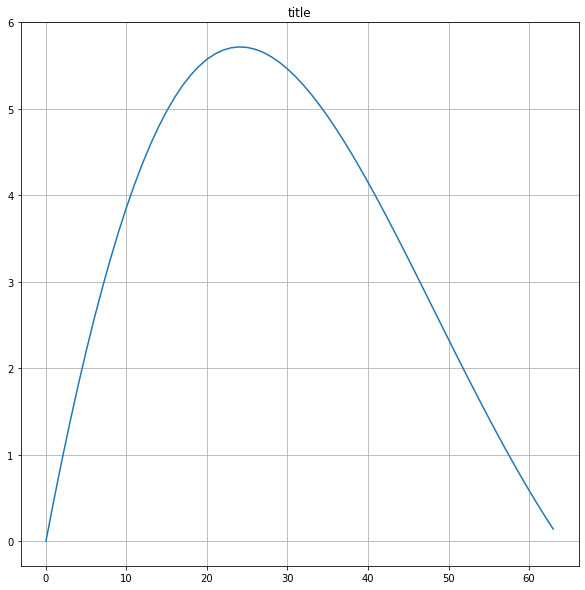

In [13]:
kernel = np.array(arr, dtype='float')
print(kernel[:10])
show_plot(kernel)

In [65]:
img_f = fourier_transform_2d(img)
img_f_f = np.asarray(img_f, float)

185


C:\Users\ACER\AppData\Local\Temp\ipykernel_6204\2761997887.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  img_f_f = np.asarray(img_f, float)


In [66]:
img_f_f_g = gray_image(img_f_f)
hist = build_histogram(img_f_f_g)
dist = build_cdf(hist)

img_r = equalize(img_f_f_g, dist)

(256,)


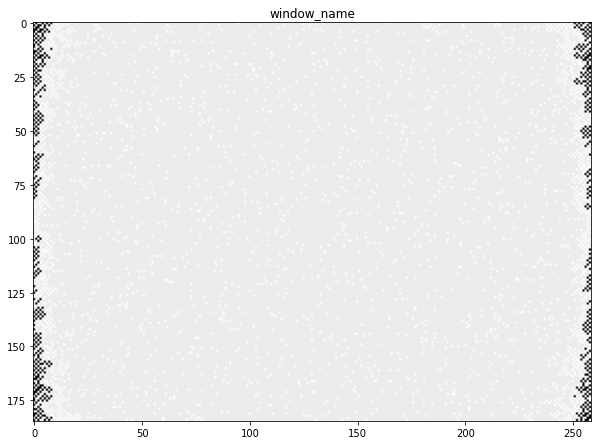

In [67]:
show_picture_plot(img_r)

185


C:\Users\ACER\AppData\Local\Temp\ipykernel_6204\1102865679.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  img_b = np.asarray(img_b, float)


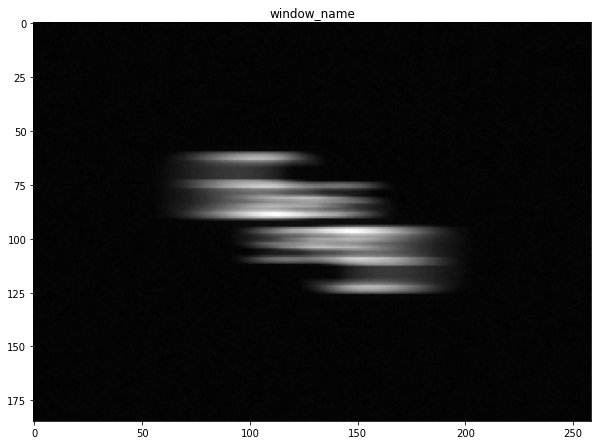

In [68]:
img_b = fourier_transform_2d_back(img_f_f)
img_b = np.asarray(img_b, float)
show_picture_plot(img_b)

In [18]:
tst = add_zeros(kernel, (ylen, xlen))

is tuple


True

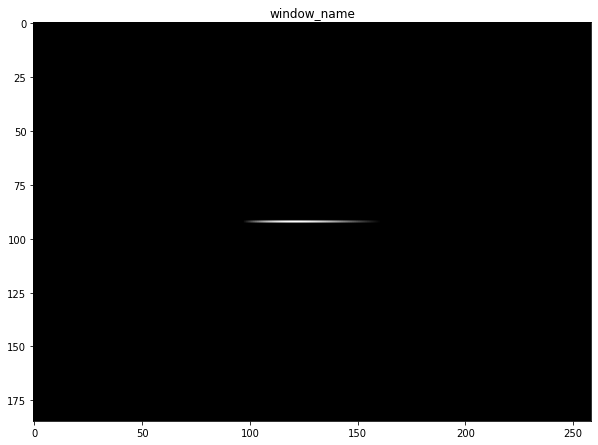

In [56]:
show_picture_plot(tst)
tst2 = gray_image(tst)
cv.imwrite(r"D:\study\moed2\9lab\func.jpg", tst2)

In [20]:
tst_f = fourier_transform_2d(tst)
tst_f_f = np.asarray(tst_f, float)

185


C:\Users\ACER\AppData\Local\Temp\ipykernel_6204\859084160.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  tst_f_f = np.asarray(tst_f, float)


In [21]:
tst_f_f_g = gray_image(tst_f_f)
hist = build_histogram(tst_f_f_g)
dist = build_cdf(hist)

tst_r = equalize(tst_f_f_g, dist)

(256,)


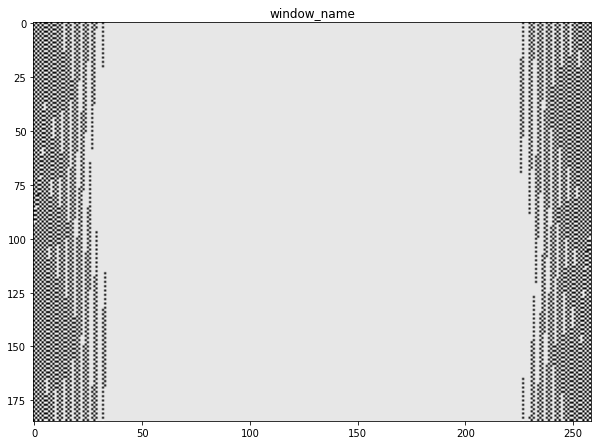

In [22]:
show_picture_plot(tst_r)

In [23]:
cast = img_f / tst_f
print(cast.shape)
cast_b= best_image(cast)

(185, 259)
255
(256,)


C:\Users\ACER\AppData\Local\Temp\ipykernel_6204\2251091493.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  img_restore_shift = (((image-mn)/amp)*255).astype('int')


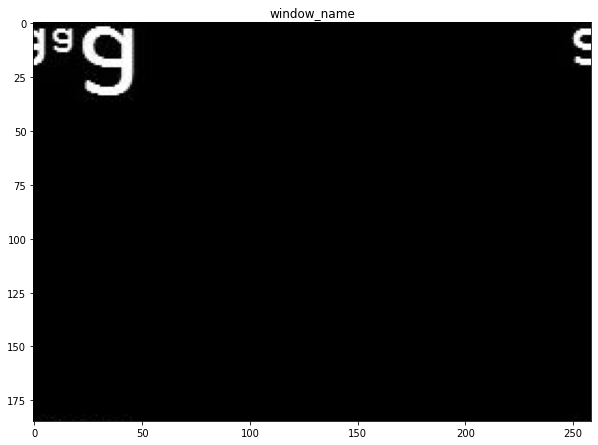

In [25]:
show_picture_plot(cast_r_f)

In [24]:
cast_r = fourier_transform_2d_back(cast)
cast_r_f = np.asarray(cast_r, float)

185


C:\Users\ACER\AppData\Local\Temp\ipykernel_6204\876115570.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  cast_r_f = np.asarray(cast_r, float)


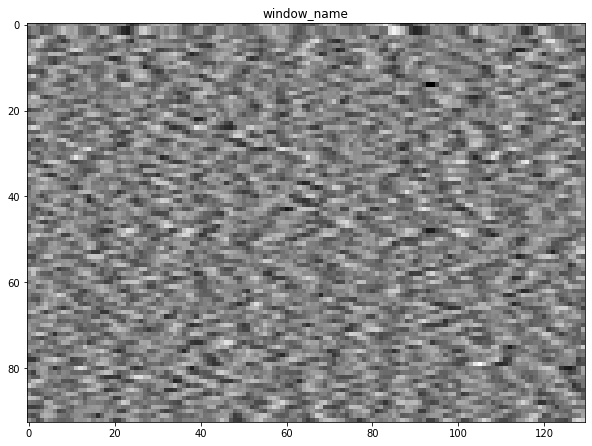

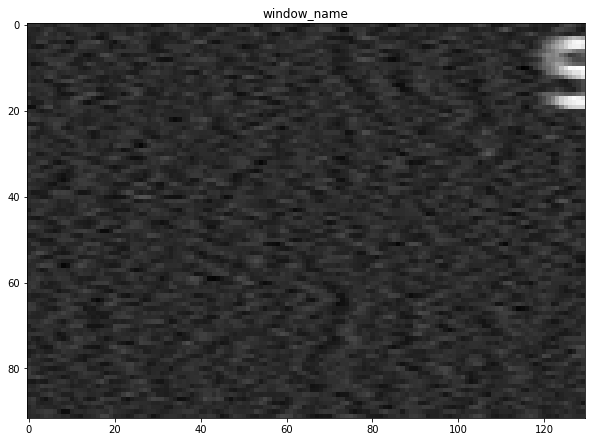

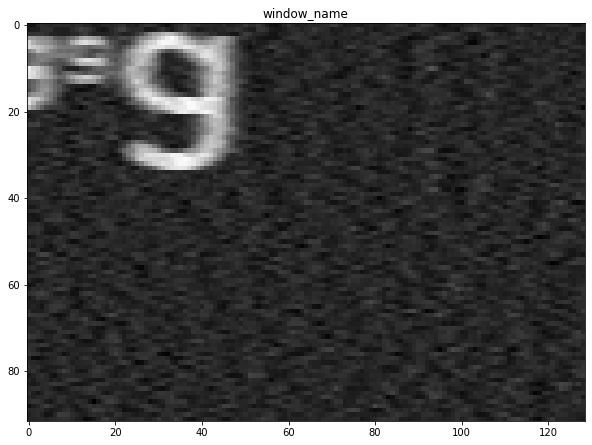

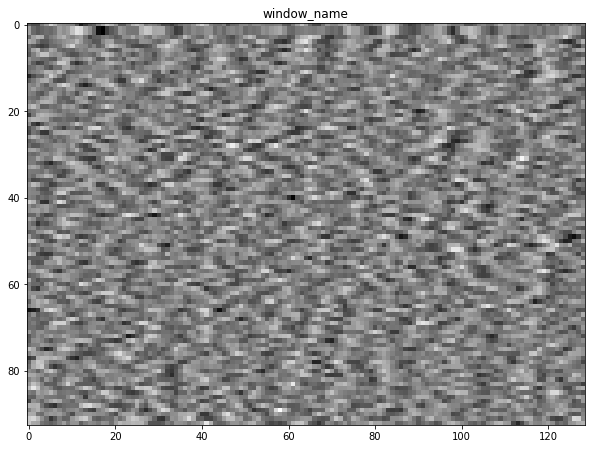

In [84]:
xlen, ylen = cast_nr_f.shape
tt = cast_nr_f[xlen//2:, ylen//2:]
tt2 = cast_nr_f[:xlen//2, ylen//2:]
tt3 = cast_nr_f[:xlen//2, :ylen//2]
tt4 = cast_nr_f[xlen//2:, :ylen//2]
show_picture_plot(tt)
show_picture_plot(tt2)
show_picture_plot(tt3)
show_picture_plot(tt4)

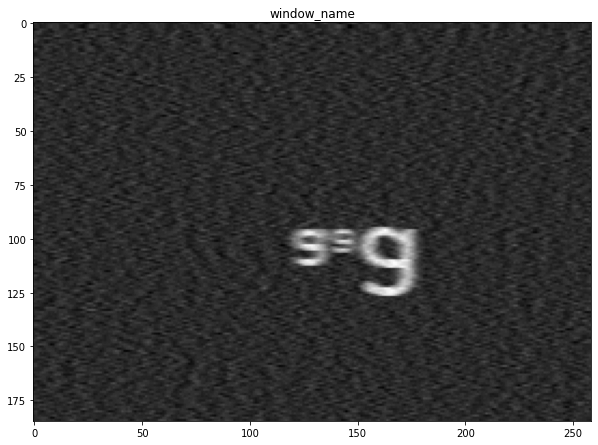

In [85]:
tt12 = np.zeros((xlen, ylen))
tt12[xlen//2+1:, ylen//2+1:] = tt3
tt12[xlen//2+1:, :ylen//2+1] = tt2
tt12[:xlen//2+1, ylen//2+1:] = tt4
tt12[:xlen//2+1, :ylen//2+1] = tt
show_picture_plot(tt12)

In [86]:
tt12 = gray_image(tt12)
cv.imwrite(r"D:\study\moed2\9lab\tt122.jpg", tt12)

True

In [80]:
# tst_f_abs = np.abs(tst_f)
# print(tst_f_abs.shape)
# tst_f_abs_sq = tst_f_abs**2
# print(tst_f_abs_sq.shape)
#
# tst_f_conj = np.conj(tst_f)
# print(tst_f_conj.shape)
#
# tmp = tst_f_conj/tst_f_abs_sq
# print(tmp.shape)
#
# tmp = tmp*img_f
# print(tmp.shape)
cast_n = (np.conj(tst_f) / (np.abs(tst_f)**2 + 4)) * img_f
# cast_nb= best_image(cast_n)

185


C:\Users\ACER\AppData\Local\Temp\ipykernel_6204\3793095523.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  cast_nr_f = np.asarray(cast_nr, float)


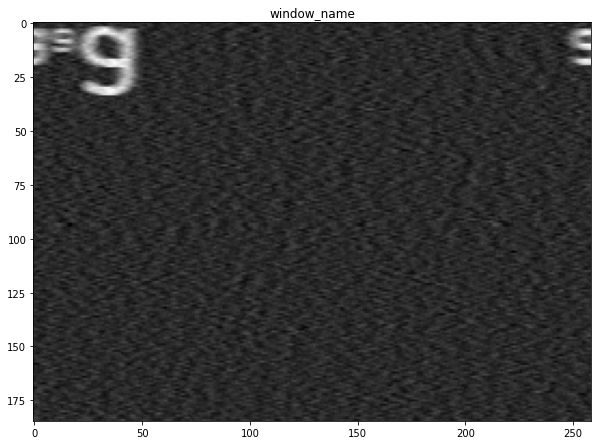

In [81]:
cast_nr = fourier_transform_2d_back(cast_n)
cast_nr_f = np.asarray(cast_nr, float)
show_picture_plot(gray_image(cast_nr_f))